## Observations and Insights 

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_stage_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_stage_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [28]:
# Checking the number of mice.
nbr_of_mice = mouse_stage_df["Mouse ID"].nunique()
print(f"There are {nbr_of_mice} unique mice in the dataset.")

There are 249 unique mice in the dataset.


In [29]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# create a df of the duplicate combination of mouse id and timepoint
stage_duplicate_df =  mouse_stage_df[mouse_stage_df.duplicated(["Mouse ID", "Timepoint"])]

# create numpy array of the deduped mouse ids
stage_duplicate_mice  = np.unique(stage_duplicate_df["Mouse ID"].values)

# print out all duplicate mouse ids
if len(stage_duplicate_mice) == 0:
    print("There are no mice with conflicting and/or duplicate records in the dataset.")
else:
    for mouse in stage_duplicate_mice:
        print(f"Mouse ID {mouse} has conflicting and/or duplicate records in the dataset.")

Mouse ID g989 has conflicting and/or duplicate records in the dataset.


In [30]:
# Optional: Get all the data for the duplicate mouse ID. 
for mouse in stage_duplicate_mice:
    all_stage_duplicates_df = mouse_stage_df.loc[mouse_stage_df['Mouse ID'] == mouse] 
    
all_stage_duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [31]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_df = mouse_stage_df.copy()

for i ,row in all_stage_duplicates_df.iterrows():
   mouse_study_df = mouse_study_df.drop(i) 

# create a df of the duplicate combination of mouse id and timepoint
study_duplicate_df =  mouse_study_df[mouse_study_df.duplicated(["Mouse ID", "Timepoint"])]

# create numpy array of the deduped mouse ids
study_duplicate_mice  = np.unique(study_duplicate_df["Mouse ID"].values)

# print out all duplicate mouse ids
if len(study_duplicate_mice) == 0:
    print("There are no mice with conflicting and/or duplicate records in the dataset.")
else:
    for mouse in study_duplicate_mice:
        print(f"Mouse ID {mouse} has conflicting and/or duplicate records in the dataset.")

There are no mice with conflicting and/or duplicate records in the dataset.


In [32]:
# Checking the number of mice in the clean DataFrame.
nbr_of_mice_cleaned = mouse_study_df["Mouse ID"].nunique()
print(f"There are {nbr_of_mice_cleaned} unique mice in the cleaned dataset.")

There are 248 unique mice in the cleaned dataset.


## Summary Statistics

In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_grp_df = mouse_study_df.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_vol_mean = regimen_grp_df["Tumor Volume (mm3)"].mean()
tumor_vol_median = regimen_grp_df["Tumor Volume (mm3)"].median()
tumor_vol_var = regimen_grp_df["Tumor Volume (mm3)"].var()
tumor_vol_std = regimen_grp_df["Tumor Volume (mm3)"].std()
tumor_vol_sem = regimen_grp_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
# Create variables to hold the new column names
tumor_mean_str = "Tumor Volume (mm3) Mean"
tumor_median_str = "Tumor Volume (mm3) Median"
tumor_var_str = 'Tumor Volume (mm3) Variance'
tumor_std_str = 'Tumor Volume (mm3) Std Dev'
tumor_sem_str = 'Tumor Volume (mm3) SEM'

# create a summary df by merging the tumor_vol_mean and the tumor_vol_median series and rename columns
regimen_summ_df = pd.merge(tumor_vol_mean,tumor_vol_median, on="Drug Regimen")
regimen_summ_df = regimen_summ_df.rename(columns={"Tumor Volume (mm3)_x": tumor_mean_str,
                                                  "Tumor Volume (mm3)_y": tumor_median_str
                              })

# Merge the summary df with the tumor_vol_var series
regimen_summ_df = pd.merge(regimen_summ_df, tumor_vol_var, on="Drug Regimen")
regimen_summ_df = regimen_summ_df.rename(columns={"Tumor Volume (mm3)": tumor_var_str
                              })

# Merge the summary df with the tumor_vol_std series
regimen_summ_df = pd.merge(regimen_summ_df, tumor_vol_std, on="Drug Regimen")
regimen_summ_df = regimen_summ_df.rename(columns={"Tumor Volume (mm3)": tumor_std_str
                              })

# Merge the summary df with the tumor_vol_sem series
regimen_summ_df = pd.merge(regimen_summ_df, tumor_vol_sem, on="Drug Regimen")
regimen_summ_df = regimen_summ_df.rename(columns={"Tumor Volume (mm3)": tumor_sem_str
                              })

regimen_summ_df

,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) Std Dev,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

regimen_grp_df["Tumor Volume (mm3)"].aggregate(['mean', 'median','var','std','sem'])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

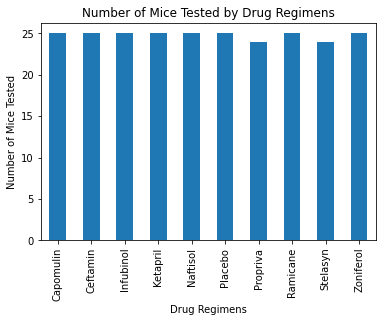

In [35]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mouse_cnt_df =  mouse_study_df.groupby('Drug Regimen')['Mouse ID'].nunique()

# Create a bar chart based off of mouse_cnt_df
mouse_cnt_chart = mouse_cnt_df.plot(kind='bar')

# Set the title, xlabel and ylabel 
plt.title("Number of Mice Tested by Drug Regimens")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Mice Tested")



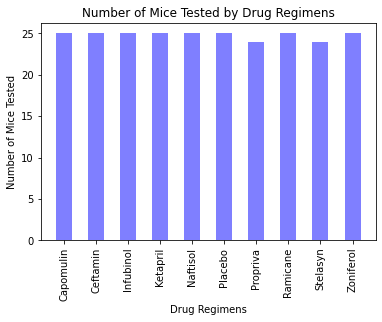

In [36]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# get the distinct count of mich by regimen
mice_cnt = mouse_study_df.groupby('Drug Regimen')['Mouse ID'].nunique()

# set axis and ticks
fig, ax = plt.subplots()

x_axis = np.arange(len(mice_cnt))

xticks = list(mice_cnt.index)
ax.set(xticks=x_axis, xticklabels=xticks)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, xticks, rotation=90)

plt.bar(x_axis, mice_cnt, color='blue', alpha=0.5, align="center", width=.5)

# set title and labels
plt.title("Number of Mice Tested by Drug Regimens")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Mice Tested")

plt.show()

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [39]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [40]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [41]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [42]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [43]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [44]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
